To be run on perlmutter

In [1]:
import os
import sys
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")

In [ ]:
from crispy_shifty.utils.io import fix_path_prefixes

pairs = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states.pair'
new_pairs = fix_path_prefixes(
    find="/home",
    replace="/global/u2/b",
    file=pairs,
    overwrite=True,
)

In [ ]:
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "05_fold_Y"
design_list_file = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states.pair'
output_path = f"/pscratch/sd/b/broerman/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_Y",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="45:00",
)

/global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


Run the following command with your desired environment active:
sbatch -a 1-216 /pscratch/sd/b/broerman/03_fold_dimer_Y/run.sh


In [ ]:
import socket
print(f"ssh {socket.gethostname()}")

ssh nid002397


In [2]:
print("""module load cudatoolkit/11.4
N=0
N2=$(( N + 1 ))
start_idx=$(( N*4 + 1 ))
end_idx=$(( N2*4 ))
source activate /global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy
time head -n $end_idx /pscratch/sd/b/broerman/05_fold_Y/tasks.cmds | tail -n +$start_idx | parallel 'CUDA_VISIBLE_DEVICES=$(("{%}" - 1)) && bash -c {}'""")

module load cudatoolkit/11.4
N=0
N2=$(( N + 1 ))
start_idx=$(( N*4 + 1 ))
end_idx=$(( N2*4 ))
source activate /global/cfs/cdirs/m4129/projects/crispy_shifty_adam/envs/crispy
time head -n $end_idx /pscratch/sd/b/broerman/05_fold_Y/tasks.cmds | tail -n +$start_idx | parallel 'CUDA_VISIBLE_DEVICES=$(("{%}" - 1)) && bash -c {}'


Run the first 100 to get 22000 folded sequences. This will include both rosetta one-state and mpnn two-state with varying betas. Analyze these structures, choose the best beta value (if any) and whether to include rosetta moving forward, then fold the rest.

13, 16, 26, 36, 38, 39, 40, 42, 46, 51, 58, 60, 63, 68, 69, 73, 78, 80, 82, 89, 98 all timed out. This is fine, we're just gonna refold everything anyways.

To run on the digs

### Collect scorefiles of the folded paired state Ys and concatenate

In [1]:
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Load resulting concatenated scorefile
TODO might have to switch to a dask accelerated approach for production

In [2]:
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import parse_scorefile_linear

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

100%|██████████| 20735/20735 [01:57<00:00, 176.85it/s]


### Dump scores_df as a CSV and then reload, for performance reasons

In [3]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [4]:
import pandas as pd
import os
simulation_name = "05_fold_Y"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,omega,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,ref,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,shift_A,shift_B,ss_sc,total_length_A,total_length_B,total_score,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_2912168aeb6e439b8266beb79f0f30d1.pdb.bz2,16.203054,29.171677,29.226545,29.116808,3.199472,3.420361,2.978582,93.670998,4,0.478022,3.0,20.917648,0,2.689890,monomer_ptm,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAABAAAAAAAAAA...,XAAAAAAAAAAAAAAABABAAAAAAAAAAAAAAAABAAAAAAAAAA...,233.111328,46.213089,46.213089,loop_match,loop_match,10.536095,190.801361,278.631042,298.032715,mpnn,11.0,7.0,14.0,0.0,LHHHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHHHLHHHHHHHHHH...,LHHHHHHHHHHHHHHHLLLHHHHHHHHHHHHHHHHLHHHHHHHHHH...,9.025812,-3595.044917,1318.200352,63.599736,233.694214,353.608932,-1088.798104,-101.844960,-59.658559,1168.337694,84.139584,142.260213,8037.411022,2658.746184,-56.622838,0.000000,-35.123728,-453.959210,22.793245,937.195273,5.996982,44.123446,2142.260729,-64.009795,12.519507,9.551972,0.775416,0.734010,"0.5,0.5",full,0.2,"70,71,72","70,71,72",104.679957,-120.032560,X16_3_13_4_ct0_fe,144.0,8.013067,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,1.560240,-276.877114,-110.88126,0.691667,0.810951,0.691384,0.748721,-850.461548,-156.840118,-621.606384,-620.090393,-395.446564,-184.883591,-366.556061,-177.461121,-170.467133,-3.015821,1.0,-5.0,0.724976,144.0,144.0,2592.932589,0.350249,0.382868,0.275359,0.363528,0.382879,0.733649,0.136726,0.000000e+00,NaN,NaN,NaN,NaN
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_c0c0c444aaea4ce1acb78855ec07f6af.pdb.bz2,15.274196,27.388128,27.720848,27.055408,3.109997,3.259141,2.960854,94.152344,5,0.513716,3.0,18.415222,0,2.626367,monomer_ptm,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,XAAAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAABAAB...,129.954163,51.600029,51.600029,loop_match,loop_match,-1.000000,465.042114,654.593384,801.777344,mpnn,26.0,32.0,12.0,0.0,LHHHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHLLLL...,LHHHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHLLLL...,13.848165,-4363.742819,1314.850168,53.754463,291.362492,400.851598,-1186.627572,-134.794232,-92.355413,1424.840987,136.020895,141.994106,4151.220273,2845.006780,-51.259917,0.000000,-32.443128,-596.019215,24.696926,1104.128484,4.922037,30.144874,2644.821180,-96.576410,12.220197,8.954142,0.753036,0.721806,"0.5,0.5",full,0.2,"89,90,91,92","89,90,91,92",146.808576,-169.243233,X19_4_19_4_ct5_fa,184.0,12.282542,/net/shared/scaffolds/pre_scaffold_DB/tj_DHRs_...,4.0,5.0,4.0,36.037050,-261.600618,59.82890,-1.000000,0.732786,0.745360,0.788725,-1131.244507,-198.669647,-783.610596,-810.276917,-462.643005,-206.668091,-419.295654,-212.627563,-204.684937,-3.142346,6.0,1.0,0.735113,184.0,184.0,-184.645277,0.303139,0.339117,0.345621,0.372976,0.571151,0.570243,0.120987,4.453714e-07,NaN,NaN,NaN,Na

### Setup for plotting

In [ ]:
import seaborn as sns

sns.set(
    context="talk",
    font_scale=1,  # make the font larger; default is pretty small
    style="ticks",  # make the background white with black lines
    palette="colorblind",  # a color palette that is colorblind friendly!
)

### Data exploration
Gonna remove the Rosetta sfxn scoreterms for now

In [21]:
rosetta = scores_df[scores_df["designed_by"] == "rosetta"]#.sample(1000, random_state=0)
mpnn = scores_df[scores_df["designed_by"] == "mpnn"]#.sample(1000, random_state=0)
sample_df = pd.concat([rosetta, mpnn])

# sample_df = scores_df.sample(2000, random_state=0)

### Remove score terms we don't care about

In [22]:
import sys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.protocols.design import beta_nov16_terms

sample_df = sample_df[
    [term for term in sample_df.columns if term not in beta_nov16_terms]
]
print(len(sample_df))
print(list(sample_df.columns))

20735
['Y_mean_pae', 'Y_mean_pae_interaction', 'Y_mean_pae_interaction_AB', 'Y_mean_pae_interaction_BA', 'Y_mean_pae_intra_chain', 'Y_mean_pae_intra_chain_A', 'Y_mean_pae_intra_chain_B', 'Y_mean_plddt', 'Y_model', 'Y_pTMscore', 'Y_recycles', 'Y_rmsd_to_reference', 'Y_seed', 'Y_tol', 'Y_type', 'abego_str_A', 'abego_str_B', 'bb_clash', 'bb_clash_A', 'bb_clash_B', 'closure_type_A', 'closure_type_B', 'cms_ac_bn', 'cms_dhr', 'cms_dhr_ac', 'cms_dhr_bn', 'designed_by', 'dhr_ac_int_count', 'dhr_bn_int_count', 'dhr_int_count', 'dssp_A', 'dssp_B', 'elapsed_time', 'loop_dist_A', 'loop_dist_B', 'loop_sc_A', 'loop_sc_B', 'mpnn_msd_betas', 'mpnn_msd_design_area', 'mpnn_msd_temperature', 'new_loop_resis_A', 'new_loop_resis_B', 'parent', 'parent_length', 'parent_loop_dist', 'parent_path', 'pivot_helix_A', 'pivot_helix_B', 'pre_break_helix', 'sc_ac_bn', 'sc_dhr', 'sc_dhr_ac', 'sc_dhr_bn', 'score', 'score_1', 'score_124', 'score_134', 'score_14', 'score_2', 'score_23', 'score_3', 'score_4', 'score_per_r

### Plot AF2 metrics

5it [00:00, 11.05it/s]


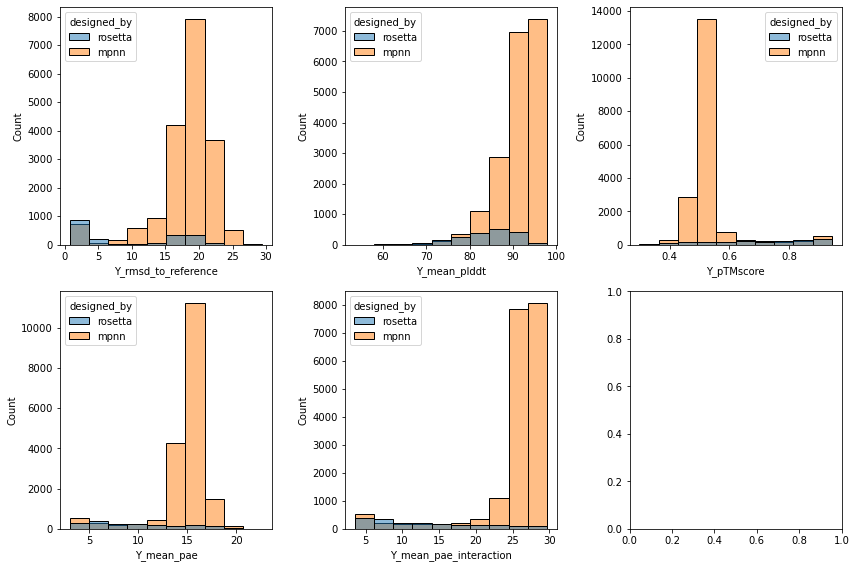

In [23]:
import matplotlib.pyplot as plt
from crispy_shifty.utils.plotting import histplot_df, pairplot_df

cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = histplot_df(
    df=sample_df,
    cols=cols,
    bins=10,
    hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores.png"))

<Figure size 1440x1440 with 0 Axes>

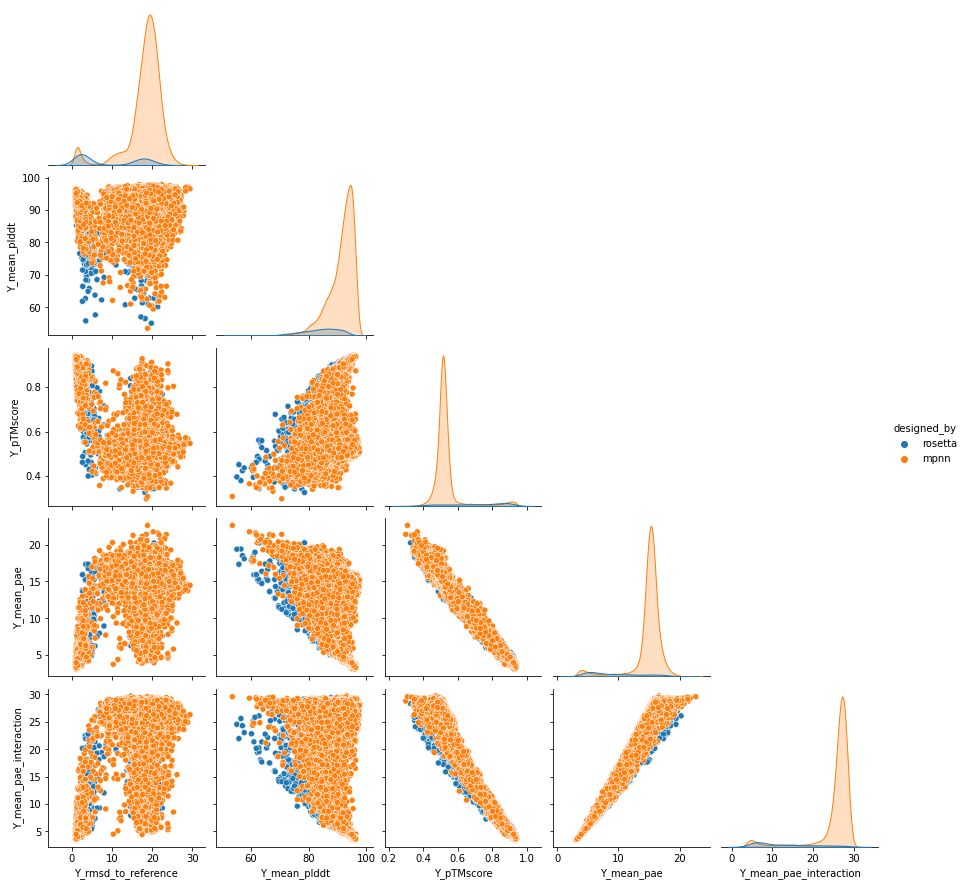

In [24]:
the_fig = pairplot_df(
    df=sample_df,
    cols=cols,
    hue="designed_by",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

In [25]:
sample_df['msd_Y_beta'] = sample_df['mpnn_msd_betas'].str.split(',').str[1].astype(float)
sample_df[['mpnn_msd_betas', 'msd_Y_beta']]

,mpnn_msd_betas,msd_Y_beta
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_cd7e8f657bea4cf19eade6d9a3a747b3.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_f7ec6823a3084647a8e1711ead21fb8a.pdb.bz2,"0.3,0.7",0.7
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_cae0dbd4ca934899b4934ad3ab9625f1.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_c2610829b62442b3b450ff671c03a4d5.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0000/05_fold_Y_14b3b6b8a9d4481ea993070e37328d82.pdb.bz2,"0.5,0.5",0.5
...,...,...
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_f69d2240b2d94f73a100b44a7c7477e2.pdb.bz2,"0.5,0.5",0.5
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_becc29b2509c43d78efc17ecaf257c67.pdb.bz2,"0.4,0.6",0.6
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_6a3769c59c8d46c98a183fa2b4d52a7d.pdb.bz2,"0.5,0.5",0.5
/pscratch/sd/b/broerman/05_fold_Y/decoys/0008/05_fold_Y_f64a9a42e81d49d29d53cf7b285b968d.pdb.bz2,"0.4,0.6",0.6


### Plot effects of MPNN beta distribution on AF2 metrics

6it [00:00,  9.50it/s]


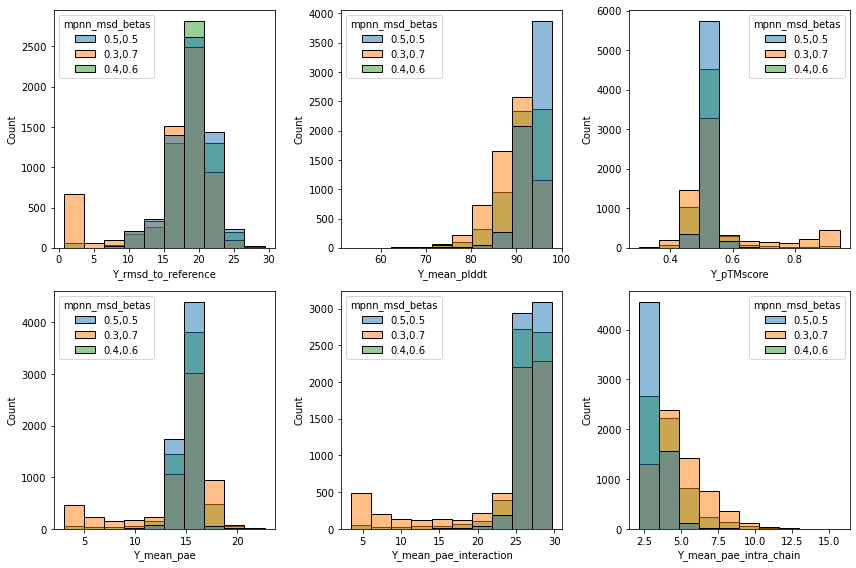

In [26]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "Y_mean_pae_intra_chain",
]
the_fig = histplot_df(
    df=mpnn,
    cols=cols,
    bins=10,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_area.png"))

<Figure size 1440x1440 with 0 Axes>

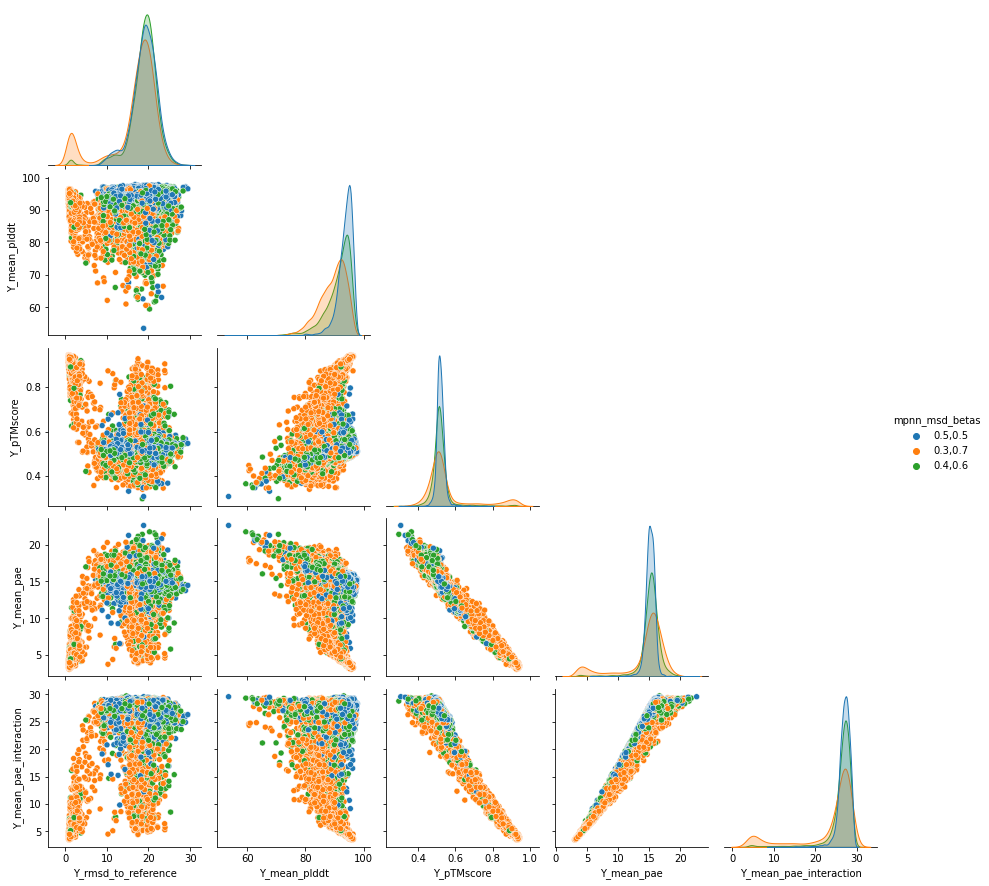

In [27]:
cols = [
    "Y_rmsd_to_reference",
    "Y_mean_plddt",
    "Y_pTMscore",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
]
the_fig = pairplot_df(
    df=mpnn,
    cols=cols,
    hue="mpnn_msd_betas",
)
# plt.savefig(os.path.join(output_path, "old_vs_new_af2_scores_paired.png"))

The 50/50 beta split very rarely resulted in folded dimers. So, for the full folding, only fold sequences from 40/60 or 30/70 distributions. Go back to 04_two_state and generate a paired list of only these distributions.

To be run on perlmutter

In [3]:
import os
import sys
sys.path.insert(0, "/global/cfs/cdirs/m4129/projects/crispy_shifty_adam")

In [5]:
from crispy_shifty.utils.io import fix_path_prefixes

pairs = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states_filtered.pair'
new_pairs = fix_path_prefixes(
    find="/home",
    replace="/global/u2/b",
    file=pairs,
    overwrite=True,
)

In [6]:
from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "05_fold_Y"
design_list_file = '/global/u2/b/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/04_two_state/mpnn_paired_states_filtered.pair'
output_path = f"/pscratch/sd/b/broerman/{simulation_name}"

options = " ".join(
    [
        "out:level 200",
    ]
)
extra_kwargs = {"models": "all"}

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.folding.fold_dimer_Y",
    design_list_file=design_list_file,
    output_path=output_path,
    perlmutter_mode=True,
    nstruct=1,
    nstruct_per_task=1,
    options=options,
    extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
    time="59:00",
)

Run the following command with your desired environment active:
sbatch -a 1-2558 /pscratch/sd/b/broerman/05_fold_Y/run.sh
